In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os


In [144]:
import numpy as np
noise = np.random.normal(0,1, 100)

## Single variable logistic regression 
## y = 5x+ 2

In [145]:
y = []
x = []

for i in range(0, 100):
    x_inp = rnd.randint(1, 100)
    y_inp = 5*x_inp + 2 + noise[i]
    
    if x_inp not in x and y_inp not in y:
        y.append(y_inp)
        x.append(x_inp)

data = {'tedad': x, 'ghymat': y}    
df = pd.DataFrame(data)   
print(df)

    tedad      ghymat
0      25  128.863734
1      22  110.504423
2      88  441.896255
3      58  292.364729
4       8   43.589475
..    ...         ...
66     35  177.745333
67     56  283.303775
68     97  488.739515
69     98  491.391633
70     63  317.724121

[71 rows x 2 columns]


In [146]:
os.remove('LinearReg.csv')
df.to_csv('LinearReg.csv', index=False)

In [147]:
df_2 = pd.read_csv('LinearReg.csv')

In [148]:
df_2

,tedad,ghymat
0,25,128.863734
1,22,110.504423
2,88,441.896255
3,58,292.364729
4,8,43.589475
...,...,...
66,35,177.745333
67,56,283.303775
68,97,488.739515
69,98,491.391633


In [149]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tedad   71 non-null     int64  
 1   ghymat  71 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [150]:
df_2.describe()

,tedad,ghymat
count,71.000000,71.000000
mean,51.253521,258.419695
std,29.383532,146.847813
min,1.000000,5.952484
25%,27.000000,137.504379
50%,51.000000,256.051798
75%,78.500000,394.398142
max,100.000000,501.762814


In [151]:
df_2.sample(5)

,tedad,ghymat
13,49,246.109605
4,8,43.589475
8,2,12.747834
61,19,97.268347
20,3,17.430311


In [152]:
X = df_2[['tedad']]
y = df_2[['ghymat']]

In [153]:
X

,tedad
0,25
1,22
2,88
3,58
4,8
...,...
66,35
67,56
68,97
69,98


In [154]:
y

,ghymat
0,128.863734
1,110.504423
2,441.896255
3,292.364729
4,43.589475
...,...
66,177.745333
67,283.303775
68,488.739515
69,491.391633


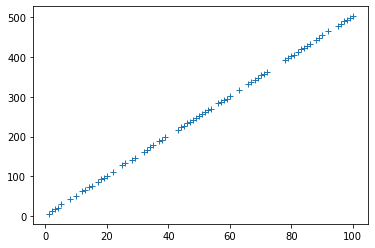

In [155]:
plt.plot(X, y, marker = '+', linestyle='')

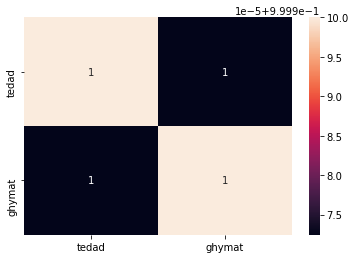

In [156]:
my_correlation = df_2.corr()
sns.heatmap(my_correlation,annot=True)

In [157]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [158]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [159]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [160]:
predictions=regressor.predict(X_test)
print(X_test)

    tedad
4       8
61     19
2      88
54     18
59     39
11     50
49     26
3      58
1      22
9      10
56     33
37     57
5      14
40     83
31    100
69     98
39     90
10      4


In [161]:
X_test

,tedad
4,8
61,19
2,88
54,18
59,39
11,50
49,26
3,58
1,22
9,10


In [162]:
predictions[0]

array([42.19802818])

In [163]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.8544403630555387
Mean Squared Error: 1.132710126668789
Root Mean Squared Error: 1.0642885542317877


In [164]:
unseen_data = np.array([100]).reshape(1,-1)
pred=regressor.predict(unseen_data)
print(pred)

[[501.90563167]]


In [165]:
regressor.coef_

array([[4.99682178]])

In [166]:
regressor.intercept_

array([2.22345396])